In [1]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline
from random import shuffle
import random
import warnings

# Dataset Overview

In [2]:
classcount = {"COVID19":0,"NORMAL":0}
covidpattern = 'covid'
normalpattern ='Normal'

In [3]:
for dirname, _, filenames in os.walk('.\input\datafinal'):
    for filename in filenames:
        if re.search(covidpattern, filename,flags=re.IGNORECASE):
            classcount["COVID19"] += 1
        if re.search(normalpattern, filename,flags=re.IGNORECASE):
            classcount["NORMAL"] += 1


In [4]:
print(classcount)

{'COVID19': 579, 'NORMAL': 877}


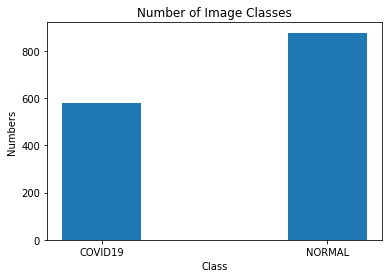

In [5]:
plt.bar(classcount.keys(), classcount.values(),width = 0.35)
plt.title('Number of Image Classes')
plt.ylabel('Numbers')
plt.xlabel('Class')
plt.savefig("Number of Image Classes.png")
plt.show()

In [6]:
count = {"train":0,"test":0}
trainpattern = 'train'
testpattern ='test'

In [7]:
for dirname, _, filenames in os.walk('.\input\datafinal'):
    for filename in filenames:
        if re.search(trainpattern, dirname,flags=re.IGNORECASE):
            count["train"] += 1
        if re.search(testpattern, dirname,flags=re.IGNORECASE):
            count["test"] += 1

In [8]:
count

{'train': 976, 'test': 480}

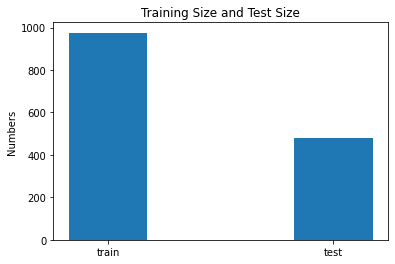

In [9]:
plt.bar(count.keys(), count.values(),width = 0.35)
plt.title('Training Size and Test Size')
plt.ylabel('Numbers')
plt.savefig("Training Size and Test Size.png")
plt.show()

# Image Overview

In [22]:
#read DataSet
TrianImage="input/datavisual/train"
TestImage="input/datavisual/test"

Normalimages = os.listdir(TrianImage + "/normal")
COVID19images = os.listdir(TrianImage + "/covid")

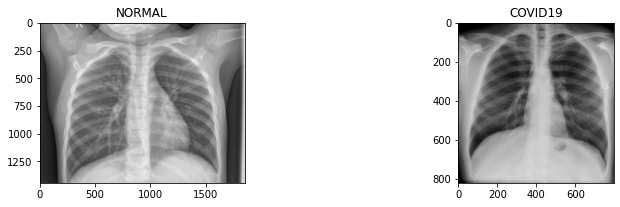

In [23]:
#plot NORMAL
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
plt.imshow(plt.imread(os.path.join(TrianImage + "/normal",Normalimages[i])),cmap='gray')
plt.title("NORMAL")
plt.subplot(3, 3, 2)
plt.imshow(plt.imread(os.path.join(TrianImage + "/covid",COVID19images[i])),cmap='gray')
plt.title("COVID19")
plt.savefig("Normal COVID.png")

plt.show()


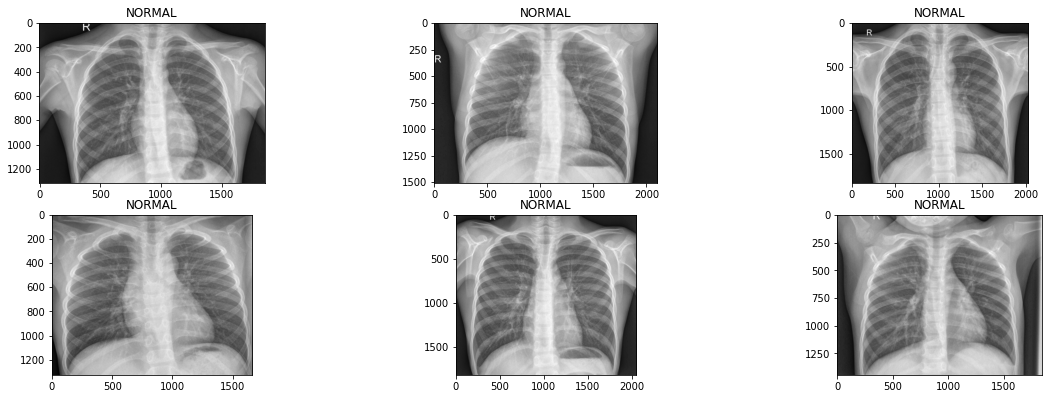

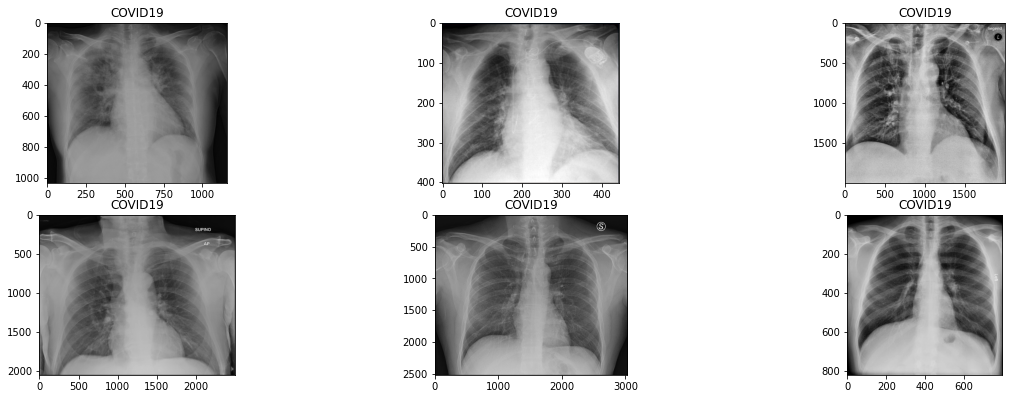

In [24]:
#plot NORMAL
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/normal",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")
plt.savefig("Normal patient.png")

plt.show()
#plot 
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/covid",COVID19images[i])),cmap='gray')
    plt.title("COVID19")
plt.savefig("Covid patient.png")

# Image standardization Preprocessing

In [10]:
TrianImage="input/datavisual/train"
#TestImage="input/datafinal/test"
#Normalimages = os.listdir(TrianImage + "/normal")
COVID19images = os.listdir(TrianImage + "/covid")

<Figure size 1440x720 with 0 Axes>

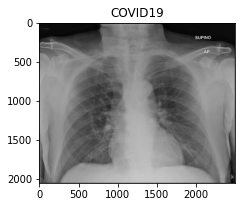

In [13]:
#plot NORMAL
plt.figure(figsize=(20,10))

#plot Covid 19
plt.figure(figsize=(20,10))
for i in range(1):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrianImage + "/covid",COVID19images[i])),cmap='gray')
    plt.title("COVID19")
plt.show()

In [15]:
train_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      fill_mode='nearest'
                                  )
train_generator =train_datagen.flow_from_directory(
     TrianImage,
     batch_size= 50,
     shuffle=shuffle,
     target_size=(300, 300)
)


Found 1 images belonging to 1 classes.


In [25]:
Labels={'COVID19':0}

# convert label to code
def getCode(label):
    return Labels[label]

# convert code to label 
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


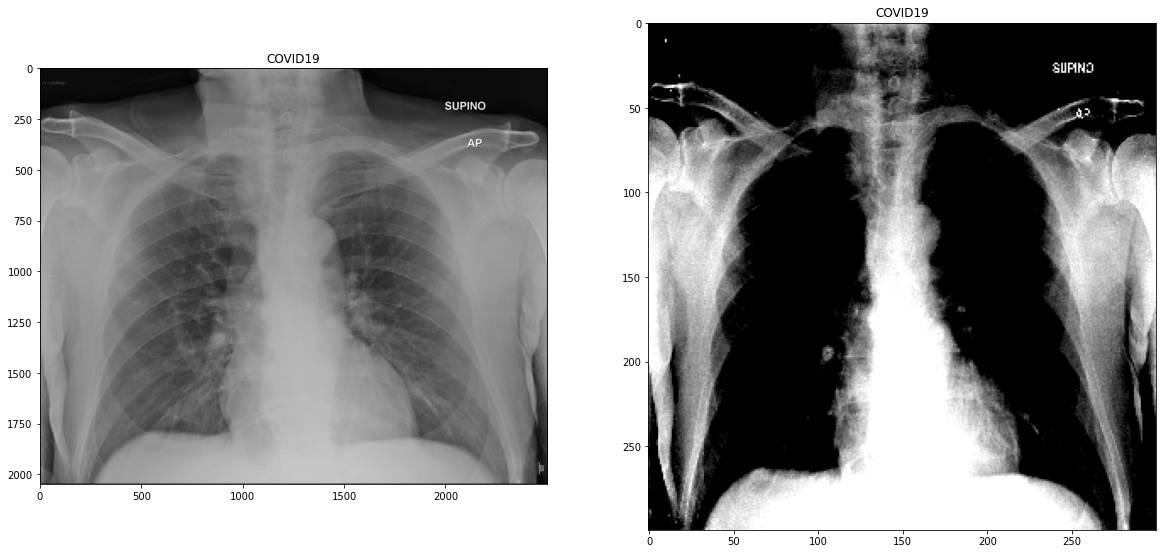

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.imshow(train_generator.__getitem__(0)[0][0])
plt.title(getLabel(np.argmax(train_generator.__getitem__(0)[1][0])) )

plt.subplot(1,2,1)
plt.imshow(plt.imread(os.path.join(TrianImage + "/covid",COVID19images[i])),cmap='gray')
plt.title("COVID19")

plt.savefig("standardization.png")

# Additional: total_cases timeline Plot

In [39]:
data = pd.read_csv('input/owid-covid-data.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50931,NaN,NaN,International,2020-10-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50932,NaN,NaN,International,2020-10-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50933,NaN,NaN,International,2020-10-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50934,NaN,NaN,International,2020-10-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
warnings.filterwarnings("ignore")
data = data[["date","location","total_cases"]]
data = data[data["location"] != "World"]
data = data[data["location"] != "Taiwan"]
data = data[data["location"] != "International"]

In [41]:
data.isnull().sum()

date              0
location          0
total_cases    3537
dtype: int64

In [42]:
data = data.fillna(0)

In [43]:
time = sorted(data["date"].unique())

In [44]:
country = data["location"].unique()
print(len(country))

210


In [45]:
color = []
random.seed(30034)
for i in range(len(country)):
    r = lambda: random.randint(40,200)
    color.append('#%02X%02X%02X' % (int(r()),0,r()))

In [46]:
country_col = {}
country = data["location"].unique()
for i in range(len(country)):
    country_col[country[i]] = color[i]
country_col = pd.DataFrame({"country" :list(country_col.keys()),"color":list(country_col.values())}) 

In [47]:
data = data.merge(country_col, left_on='location', right_on='country')
data

,date,location,total_cases,country,color
0,2019-12-31,Afghanistan,0.0,Afghanistan,#5C00B0
1,2020-01-01,Afghanistan,0.0,Afghanistan,#5C00B0
2,2020-01-02,Afghanistan,0.0,Afghanistan,#5C00B0
3,2020-01-03,Afghanistan,0.0,Afghanistan,#5C00B0
4,2020-01-04,Afghanistan,0.0,Afghanistan,#5C00B0
...,...,...,...,...,...
50052,2020-10-14,Zimbabwe,8036.0,Zimbabwe,#B9009C
50053,2020-10-15,Zimbabwe,8055.0,Zimbabwe,#B9009C
50054,2020-10-16,Zimbabwe,8075.0,Zimbabwe,#B9009C
50055,2020-10-17,Zimbabwe,8099.0,Zimbabwe,#B9009C


In [48]:
warnings.filterwarnings("ignore")
tl = Timeline()
for i in time:
    df_sub = data[data["date"]==i].sort_values(by="total_cases")
    cats_list = list(df_sub["location"])[-10:]                         
    csum_list = list(round(df_sub["total_cases"],3))[-10:]
    color_list = list(df_sub["color"])[-10:]
    #print(color_list)
    y = []
    for j in range(10):
        y.append(
            opts.BarItem(
                name = cats_list[j],
                value = csum_list[j],
                itemstyle_opts = opts.ItemStyleOpts(color=color_list[j])
            )
        )
    bar = (
        Bar(init_opts=opts.InitOpts(width='720px', height='320px'))
        .add_xaxis(xaxis_data=cats_list)
        .add_yaxis(series_name='', y_axis=y, label_opts = opts.LabelOpts(position="right",font_weight="bold"),category_gap=15)
        .reversal_axis()
        .set_global_opts(
            title_opts = opts.TitleOpts("Total confirmed cases of COVID-19（Date：{}）".format(i),pos_left=350,padding=[30,20]),
            xaxis_opts = opts.AxisOpts(max_=10000000)
        )
    )
    tl.add(bar, "{}".format(i))
    tl.add_schema(play_interval=500, is_loop_play=False)
tl.render("Covid-19 Daily Confirmed Cases Timeline.html")
#https://github.com/owid/covid-19-data/tree/master/public/data

E:\Anaconda\lib\site-packages\pyecharts\charts\composite_charts\timeline.py:12: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: Pendi

E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning

E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning

E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning

E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning

E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
E:\Anaconda\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning

'E:\\Uni\\data2\\code\\Covid-19 Daily Confirmed Cases Timeline.html'